In [1]:
import subprocess
import re
from math import isclose

def is_float(value):
    """주어진 값이 부동소수점 수인지 확인합니다."""
    return bool(re.match(r'^-?\d+(\.\d+)?$', value))

def compare_outputs(actual, expected, partial=False):
    """실제 출력과 예상 출력을 비교합니다. 부분적 일치도 허용될 수 있습니다."""
    if partial:
        expected = expected[:len(actual)]
    if len(actual) > len(expected):
        return False  # 실제 출력이 예상 출력보다 길면, 일치하지 않습니다.
    for output, gold in zip(actual, expected):
        if is_float(output) and is_float(gold):
            if not isclose(float(output), float(gold), rel_tol=1e-9):
                return False
        elif output != gold:
            return False
    return True

def run_test_cases(file, input_data_list, expected_output_list):
    Test_Failure_List = []
    """테스트 케이스를 실행하고, 정확도를 계산합니다."""
    correct_tests = 0

    for index, cpp_input in enumerate(input_data_list):
        partial = False
        try:
            process = subprocess.run([f'./gold_compile_folder/{file[:-4]}'], input=cpp_input, text=True, capture_output=True, timeout=10)
            actual_output = process.stdout.strip().split()
        except subprocess.TimeoutExpired as e:
            actual_output = e.stdout.strip().split() if e.stdout else []
            partial = True
        if compare_outputs(actual_output, expected_output_list[index], partial=partial):
            correct_tests += 1
        else:
            expected_output = ' '.join(expected_output_list[index])
            actual_output_joined = ' '.join(actual_output)
            with open(f'./gold_test_case_error_log/{file[:-4]}.txt', 'a') as err_log_file:
                err_log_file.write(f"Test Case {index + 1} Failed: Expected '{expected_output}', Got '{actual_output_joined}'")
            Test_Failure_List.append(index)

    test_case_length = len(input_data_list)
    logical_error_rate = 1 - correct_tests / test_case_length
    print(f'Logical error rate: {logical_error_rate}')

    return [logical_error_rate] + Test_Failure_List   

In [3]:
import os
import json
import subprocess
from tqdm import tqdm

path = './CodeT5_LineNumber_cpp_gold/'
file_list = os.listdir(path)
compile_error = []
gold_logical_error_rate = {}
test_case_error = []
time_out_error = []

for cpp_file in tqdm(file_list):
    filepath = path + '/' + cpp_file
    test_case_txt_number = cpp_file.split('Problem_')[1].split('_')[0]
    test_cases_file_path = './cpp_test_case/' + test_case_txt_number + '.txt'
    
    compile_error_log_file = "./gold_test_result/compile_error_log.txt"

    compile_result = subprocess.run(['g++', '-o', f'./gold_compile_folder/{cpp_file[:-4]}', filepath], capture_output=True)
    if compile_result.returncode != 0:
        compile_error.append(f'{cpp_file[:-4]}')
        with open(compile_error_log_file, 'a') as compile_error_file:
            compile_error_file.write(f'{cpp_file[:-4]}\n')
            compile_error_file.write(f'{compile_result.stderr}\n\n')
        continue
        
    with open(test_cases_file_path, 'r') as test_file:
        test_cases = test_file.read().split(', ')  # 각 테스트 케이스 분리
    
    if len(test_cases) < 2:
        print(f'Test Case Error - {test_case_txt_number}.txt')
        test_case_error.append(test_case_txt_number)
        continue
        
    test_data_list = []
    output_list = []

    for index, test_case in enumerate(test_cases):
        if not test_case.strip():
            continue
        input_part, output_part = test_case.split('\noutput: ')
        input_data = input_part.split('input: ')[1]
        expected_output = output_part.strip()
        test_data_list.append(input_data)
        output_list.append(expected_output)

        if index == len(test_cases) - 1:
            output_list[index] = output_list[index].split('\n')[0]

    test_input_list = []
    for in_data in test_data_list:
        in_data = in_data.replace("\\n", "\n")
        test_input_list.append(in_data[1:-1].strip())

    test_output_list = []
    for out_data in output_list:
        out_data = out_data.replace("\\n", '\n')
        out_data = out_data.replace("\"", "")
        out_data = out_data.split()
        test_output_list.append(out_data)

    error_line_number = []
    test_case_length = len(test_output_list)
    correct_test = len(test_output_list)
    test_result = run_test_cases(cpp_file, test_input_list, test_output_list)
    gold_logical_error_rate[cpp_file[:-4]] = test_result
    print(f'{cpp_file[:-4]} Error rate = {test_result[0]}')

pretty_print = json.dumps(gold_logical_error_rate)
print(pretty_print)

print(f'Compile Error {len(compile_error)}')
print(f'Test case error {len(test_case_error)}')

 73%|███████▎  | 625/861 [1:38:33<36:20:24, 554.34s/it]

Logical error rate: 0.0
Problem_157_gold_811 Error rate = 0.0


 73%|███████▎  | 626/861 [1:38:34<25:21:07, 388.37s/it]

Logical error rate: 0.0
Problem_57_gold_319 Error rate = 0.0


 73%|███████▎  | 627/861 [1:38:39<17:46:27, 273.45s/it]

Logical error rate: 1.0
Problem_39_gold_215 Error rate = 1.0


 73%|███████▎  | 628/861 [1:38:40<12:24:39, 191.76s/it]

Logical error rate: 0.0
Problem_17_gold_72 Error rate = 0.0


 73%|███████▎  | 629/861 [1:39:11<9:14:20, 143.37s/it] 

Logical error rate: 0.0
Problem_84_gold_442 Error rate = 0.0


 73%|███████▎  | 630/861 [1:39:21<6:37:46, 103.32s/it]

Logical error rate: 1.0
Problem_130_gold_624 Error rate = 1.0


 73%|███████▎  | 631/861 [1:39:23<4:40:04, 73.06s/it] 

Logical error rate: 0.030000000000000027
Problem_40_gold_147 Error rate = 0.030000000000000027


 74%|███████▎  | 633/861 [1:39:25<2:17:49, 36.27s/it]

Logical error rate: 0.0
Problem_47_gold_177 Error rate = 0.0


 74%|███████▎  | 634/861 [1:39:26<1:37:21, 25.73s/it]

Logical error rate: 0.79
Problem_19_gold_81 Error rate = 0.79


 74%|███████▍  | 635/861 [1:39:27<1:09:02, 18.33s/it]

Logical error rate: 0.0
Problem_44_gold_241 Error rate = 0.0


 74%|███████▍  | 636/861 [1:39:42<1:05:04, 17.36s/it]

Logical error rate: 0.0
Problem_34_gold_191 Error rate = 0.0


 74%|███████▍  | 637/861 [1:39:43<46:35, 12.48s/it]  

Logical error rate: 0.0
Problem_156_gold_809 Error rate = 0.0


 74%|███████▍  | 638/861 [1:39:44<33:41,  9.06s/it]

Logical error rate: 0.0
Problem_27_gold_127 Error rate = 0.0


 74%|███████▍  | 639/861 [1:40:01<41:25, 11.20s/it]

Logical error rate: 0.62
Problem_49_gold_284 Error rate = 0.62


 74%|███████▍  | 640/861 [1:40:02<30:03,  8.16s/it]

Logical error rate: 0.0
Problem_98_gold_505 Error rate = 0.0


 74%|███████▍  | 641/861 [1:40:03<22:05,  6.02s/it]

Logical error rate: 0.0
Problem_148_gold_760 Error rate = 0.0


 75%|███████▍  | 642/861 [1:40:04<16:38,  4.56s/it]

Logical error rate: 0.0
Problem_88_gold_462 Error rate = 0.0


 75%|███████▍  | 643/861 [1:40:05<12:52,  3.54s/it]

Logical error rate: 0.745
Problem_53_gold_298 Error rate = 0.745


 75%|███████▍  | 644/861 [1:40:06<10:08,  2.80s/it]

Logical error rate: 0.0
Problem_88_gold_449 Error rate = 0.0


 75%|███████▍  | 645/861 [1:40:07<08:28,  2.35s/it]

Logical error rate: 0.0
Problem_110_gold_568 Error rate = 0.0


 75%|███████▌  | 646/861 [1:40:09<07:04,  1.97s/it]

Logical error rate: 0.0
Problem_88_gold_472 Error rate = 0.0


 75%|███████▌  | 647/861 [1:40:12<08:46,  2.46s/it]

Logical error rate: 0.0
Problem_0_gold_1 Error rate = 0.0


 75%|███████▌  | 648/861 [1:40:13<07:17,  2.05s/it]

Logical error rate: 0.0
Problem_119_gold_603 Error rate = 0.0


 75%|███████▌  | 649/861 [1:40:14<06:17,  1.78s/it]

Logical error rate: 0.0
Problem_45_gold_165 Error rate = 0.0


 75%|███████▌  | 650/861 [1:40:29<19:20,  5.50s/it]

Logical error rate: 0.0
Problem_21_gold_100 Error rate = 0.0


 76%|███████▌  | 651/861 [1:40:30<14:39,  4.19s/it]

Logical error rate: 0.0
Problem_127_gold_617 Error rate = 0.0


 76%|███████▌  | 652/861 [1:40:31<11:16,  3.24s/it]

Logical error rate: 0.0
Problem_67_gold_362 Error rate = 0.0


 76%|███████▌  | 653/861 [1:40:44<22:04,  6.37s/it]

Logical error rate: 0.0
Problem_159_gold_836 Error rate = 0.0


 76%|███████▌  | 655/861 [1:40:46<12:19,  3.59s/it]

Logical error rate: 0.0
Problem_158_gold_729 Error rate = 0.0


 76%|███████▌  | 656/861 [1:40:47<09:42,  2.84s/it]

Logical error rate: 0.995
Problem_102_gold_531 Error rate = 0.995


 76%|███████▋  | 657/861 [1:40:48<07:51,  2.31s/it]

Logical error rate: 0.0
Problem_76_gold_398 Error rate = 0.0


 76%|███████▋  | 658/861 [1:40:49<06:32,  1.93s/it]

Logical error rate: 1.0
Problem_133_gold_635 Error rate = 1.0


 77%|███████▋  | 659/861 [1:40:50<05:38,  1.67s/it]

Logical error rate: 0.0
Problem_88_gold_457 Error rate = 0.0


 77%|███████▋  | 660/861 [1:40:52<05:04,  1.52s/it]

Logical error rate: 1.0
Problem_46_gold_247 Error rate = 1.0


 77%|███████▋  | 661/861 [1:40:53<04:37,  1.39s/it]

Logical error rate: 0.0
Problem_48_gold_183 Error rate = 0.0


 77%|███████▋  | 662/861 [1:40:54<04:22,  1.32s/it]

Logical error rate: 0.0
Problem_82_gold_432 Error rate = 0.0


 77%|███████▋  | 664/861 [1:40:56<03:35,  1.10s/it]

Logical error rate: 0.0
Problem_65_gold_278 Error rate = 0.0


 77%|███████▋  | 665/861 [1:40:57<03:33,  1.09s/it]

Logical error rate: 0.0
Problem_142_gold_681 Error rate = 0.0


 77%|███████▋  | 667/861 [1:40:58<03:09,  1.02it/s]

Logical error rate: 0.735
Problem_30_gold_134 Error rate = 0.735


 78%|███████▊  | 668/861 [1:40:59<03:14,  1.01s/it]

Logical error rate: 0.0
Problem_147_gold_707 Error rate = 0.0


 78%|███████▊  | 669/861 [1:41:00<03:21,  1.05s/it]

Logical error rate: 0.0
Problem_156_gold_802 Error rate = 0.0


 78%|███████▊  | 670/861 [1:41:02<03:27,  1.09s/it]

Logical error rate: 0.0
Problem_158_gold_817 Error rate = 0.0


 78%|███████▊  | 671/861 [1:41:02<03:13,  1.02s/it]

Logical error rate: 0.0
Problem_42_gold_235 Error rate = 0.0


 78%|███████▊  | 672/861 [1:41:12<11:06,  3.53s/it]

Logical error rate: 0.0
Problem_35_gold_196 Error rate = 0.0


 78%|███████▊  | 673/861 [1:41:13<08:47,  2.80s/it]

Logical error rate: 0.09499999999999997
Problem_93_gold_481 Error rate = 0.09499999999999997


 78%|███████▊  | 674/861 [1:41:14<07:07,  2.28s/it]

Logical error rate: 0.0
Problem_160_gold_743 Error rate = 0.0


 78%|███████▊  | 675/861 [1:41:15<06:00,  1.94s/it]

Logical error rate: 0.0
Problem_158_gold_723 Error rate = 0.0


 79%|███████▊  | 676/861 [1:41:16<04:45,  1.54s/it]

Test Case Error - 132.txt


 79%|███████▊  | 677/861 [1:41:19<05:47,  1.89s/it]

Logical error rate: 0.0
Problem_7_gold_16 Error rate = 0.0


 79%|███████▉  | 679/861 [1:41:20<04:11,  1.38s/it]

Logical error rate: 0.0
Problem_58_gold_325 Error rate = 0.0


 79%|███████▉  | 680/861 [1:41:21<03:59,  1.32s/it]

Logical error rate: 0.0
Problem_160_gold_840 Error rate = 0.0


 79%|███████▉  | 681/861 [1:41:23<04:14,  1.42s/it]

Logical error rate: 0.995
Problem_105_gold_537 Error rate = 0.995


 79%|███████▉  | 682/861 [1:41:25<04:48,  1.61s/it]

Logical error rate: 0.0
Problem_11_gold_36 Error rate = 0.0


 79%|███████▉  | 683/861 [1:41:26<04:17,  1.45s/it]

Logical error rate: 0.0
Problem_124_gold_611 Error rate = 0.0


 79%|███████▉  | 684/861 [1:41:27<03:39,  1.24s/it]

Logical error rate: 0.0
Problem_55_gold_306 Error rate = 0.0


 80%|███████▉  | 685/861 [1:41:47<19:50,  6.76s/it]

Logical error rate: 0.505
Problem_7_gold_20 Error rate = 0.505


 80%|███████▉  | 686/861 [1:41:48<14:49,  5.08s/it]

Logical error rate: 0.0
Problem_48_gold_259 Error rate = 0.0


 80%|███████▉  | 687/861 [1:41:49<11:11,  3.86s/it]

Logical error rate: 0.0
Problem_88_gold_469 Error rate = 0.0


 80%|███████▉  | 688/861 [1:41:50<08:46,  3.04s/it]

Logical error rate: 0.0
Problem_32_gold_146 Error rate = 0.0


 80%|████████  | 689/861 [1:41:51<07:10,  2.50s/it]

Logical error rate: 0.0
Problem_158_gold_819 Error rate = 0.0


 80%|████████  | 690/861 [1:42:00<12:57,  4.54s/it]

Logical error rate: 0.0
Problem_63_gold_351 Error rate = 0.0


 80%|████████  | 692/861 [1:42:02<07:43,  2.74s/it]

Logical error rate: 0.85
Problem_41_gold_151 Error rate = 0.85


 80%|████████  | 693/861 [1:42:04<07:06,  2.54s/it]

Logical error rate: 0.0
Problem_53_gold_296 Error rate = 0.0


 81%|████████  | 694/861 [1:42:05<05:50,  2.10s/it]

Logical error rate: 0.0
Problem_158_gold_822 Error rate = 0.0


 81%|████████  | 695/861 [1:42:07<04:58,  1.80s/it]

Logical error rate: 0.0
Problem_46_gold_169 Error rate = 0.0


 81%|████████  | 696/861 [1:42:08<04:20,  1.58s/it]

Logical error rate: 0.0
Problem_99_gold_512 Error rate = 0.0


 81%|████████  | 697/861 [1:42:09<03:55,  1.43s/it]

Logical error rate: 0.0
Problem_103_gold_533 Error rate = 0.0


 81%|████████  | 698/861 [1:42:10<03:34,  1.32s/it]

Logical error rate: 0.0
Problem_65_gold_280 Error rate = 0.0


 81%|████████  | 699/861 [1:42:11<03:22,  1.25s/it]

Logical error rate: 0.0050000000000000044
Problem_75_gold_386 Error rate = 0.0050000000000000044


 81%|████████▏ | 700/861 [1:42:12<03:17,  1.22s/it]

Logical error rate: 0.0
Problem_60_gold_331 Error rate = 0.0


 81%|████████▏ | 701/861 [1:42:13<03:08,  1.18s/it]

Logical error rate: 0.0
Problem_22_gold_104 Error rate = 0.0


 82%|████████▏ | 702/861 [1:42:25<11:22,  4.29s/it]

Logical error rate: 0.0
Problem_49_gold_282 Error rate = 0.0


 82%|████████▏ | 703/861 [1:42:26<08:43,  3.31s/it]

Logical error rate: 0.0
Problem_152_gold_785 Error rate = 0.0


 82%|████████▏ | 704/861 [1:42:27<06:56,  2.65s/it]

Logical error rate: 0.0
Problem_102_gold_530 Error rate = 0.0


 82%|████████▏ | 705/861 [1:42:28<05:35,  2.15s/it]

Logical error rate: 0.5919540229885057
Problem_152_gold_781 Error rate = 0.5919540229885057


 82%|████████▏ | 706/861 [1:42:29<04:43,  1.83s/it]

Logical error rate: 0.0
Problem_44_gold_239 Error rate = 0.0


 82%|████████▏ | 707/861 [1:42:30<04:10,  1.63s/it]

Logical error rate: 0.0
Problem_88_gold_471 Error rate = 0.0


 82%|████████▏ | 708/861 [1:42:31<03:43,  1.46s/it]

Logical error rate: 0.0
Problem_115_gold_590 Error rate = 0.0


 82%|████████▏ | 709/861 [1:42:32<03:26,  1.36s/it]

Logical error rate: 0.0
Problem_135_gold_642 Error rate = 0.0


 82%|████████▏ | 710/861 [1:42:33<03:10,  1.26s/it]

Logical error rate: 0.0
Problem_45_gold_167 Error rate = 0.0


 83%|████████▎ | 711/861 [1:42:35<03:22,  1.35s/it]

Logical error rate: 0.0
Problem_1_gold_8 Error rate = 0.0


 83%|████████▎ | 712/861 [1:42:36<03:13,  1.30s/it]

Logical error rate: 0.0
Problem_17_gold_67 Error rate = 0.0


 83%|████████▎ | 714/861 [1:42:38<02:38,  1.08s/it]

Logical error rate: 0.0
Problem_136_gold_644 Error rate = 0.0


 83%|████████▎ | 715/861 [1:42:39<02:35,  1.07s/it]

Logical error rate: 0.040000000000000036
Problem_121_gold_605 Error rate = 0.040000000000000036


 83%|████████▎ | 716/861 [1:42:40<02:37,  1.09s/it]

Logical error rate: 0.0
Problem_160_gold_741 Error rate = 0.0


 83%|████████▎ | 717/861 [1:42:40<02:17,  1.05it/s]

Logical error rate: 0.0
Problem_77_gold_402 Error rate = 0.0


 83%|████████▎ | 718/861 [1:42:43<03:25,  1.44s/it]

Logical error rate: 0.0
Problem_82_gold_440 Error rate = 0.0


 84%|████████▎ | 719/861 [1:42:44<03:00,  1.27s/it]

Logical error rate: 0.0
Problem_155_gold_799 Error rate = 0.0


 84%|████████▎ | 720/861 [1:42:45<02:50,  1.21s/it]

Logical error rate: 0.0
Problem_160_gold_738 Error rate = 0.0


 84%|████████▎ | 721/861 [1:42:46<02:43,  1.17s/it]

Logical error rate: 0.0
Problem_88_gold_461 Error rate = 0.0


 84%|████████▍ | 722/861 [1:42:47<02:41,  1.16s/it]

Logical error rate: 0.0
Problem_136_gold_650 Error rate = 0.0


 84%|████████▍ | 723/861 [1:42:48<02:23,  1.04s/it]

Logical error rate: 0.0
Problem_55_gold_304 Error rate = 0.0


 84%|████████▍ | 724/861 [1:42:49<02:24,  1.05s/it]

Logical error rate: 0.0
Problem_18_gold_80 Error rate = 0.0


 84%|████████▍ | 725/861 [1:42:50<02:28,  1.09s/it]

Logical error rate: 0.0
Problem_78_gold_416 Error rate = 0.0


 84%|████████▍ | 726/861 [1:42:51<02:25,  1.08s/it]

Logical error rate: 0.0
Problem_164_gold_757 Error rate = 0.0


 84%|████████▍ | 727/861 [1:42:54<03:19,  1.49s/it]

Logical error rate: 0.03500000000000003
Problem_159_gold_837 Error rate = 0.03500000000000003


 85%|████████▍ | 728/861 [1:42:55<02:59,  1.35s/it]

Logical error rate: 0.0
Problem_164_gold_859 Error rate = 0.0


 85%|████████▍ | 729/861 [1:42:56<02:50,  1.29s/it]

Logical error rate: 0.8049999999999999
Problem_93_gold_482 Error rate = 0.8049999999999999


 85%|████████▍ | 730/861 [1:44:28<1:02:23, 28.58s/it]

Logical error rate: 0.0
Problem_62_gold_346 Error rate = 0.0


 85%|████████▍ | 731/861 [1:44:29<44:03, 20.33s/it]  

Logical error rate: 0.0
Problem_48_gold_181 Error rate = 0.0


 85%|████████▌ | 732/861 [1:44:30<31:17, 14.55s/it]

Logical error rate: 0.0
Problem_48_gold_257 Error rate = 0.0


 85%|████████▌ | 733/861 [1:44:32<22:31, 10.56s/it]

Logical error rate: 1.0
Problem_37_gold_208 Error rate = 1.0


 85%|████████▌ | 734/861 [1:44:33<16:22,  7.73s/it]

Logical error rate: 0.0
Problem_46_gold_250 Error rate = 0.0


 85%|████████▌ | 735/861 [1:44:34<12:04,  5.75s/it]

Logical error rate: 0.125
Problem_113_gold_572 Error rate = 0.125


 85%|████████▌ | 736/861 [1:44:35<09:05,  4.37s/it]

Logical error rate: 0.0
Problem_60_gold_336 Error rate = 0.0


 86%|████████▌ | 737/861 [1:44:36<07:00,  3.39s/it]

Logical error rate: 0.0
Problem_22_gold_103 Error rate = 0.0


 86%|████████▌ | 738/861 [1:44:37<05:32,  2.70s/it]

Logical error rate: 0.0
Problem_46_gold_251 Error rate = 0.0


 86%|████████▌ | 739/861 [1:44:38<04:21,  2.14s/it]

Logical error rate: 0.0
Problem_161_gold_749 Error rate = 0.0


 86%|████████▌ | 740/861 [1:44:39<03:42,  1.84s/it]

Logical error rate: 1.0
Problem_139_gold_663 Error rate = 1.0


 86%|████████▌ | 741/861 [1:44:40<03:15,  1.63s/it]

Logical error rate: 0.0
Problem_15_gold_61 Error rate = 0.0


 86%|████████▌ | 742/861 [1:44:42<03:30,  1.77s/it]

Logical error rate: 0.0
Problem_123_gold_607 Error rate = 0.0


 86%|████████▋ | 743/861 [1:44:43<03:06,  1.58s/it]

Logical error rate: 0.0
Problem_160_gold_846 Error rate = 0.0


 86%|████████▋ | 744/861 [1:44:45<02:57,  1.52s/it]

Logical error rate: 0.0
Problem_56_gold_310 Error rate = 0.0


 87%|████████▋ | 745/861 [1:44:46<02:43,  1.41s/it]

Logical error rate: 0.0
Problem_148_gold_764 Error rate = 0.0


 87%|████████▋ | 746/861 [1:44:47<02:33,  1.34s/it]

Logical error rate: 0.0
Problem_37_gold_209 Error rate = 0.0


 87%|████████▋ | 747/861 [1:44:48<02:25,  1.27s/it]

Logical error rate: 0.0
Problem_149_gold_769 Error rate = 0.0


 87%|████████▋ | 748/861 [1:44:50<02:26,  1.30s/it]

Logical error rate: 0.615
Problem_62_gold_273 Error rate = 0.615


 87%|████████▋ | 750/861 [1:44:51<02:00,  1.08s/it]

Logical error rate: 0.0
Problem_88_gold_468 Error rate = 0.0


 87%|████████▋ | 751/861 [1:45:08<10:20,  5.64s/it]

Logical error rate: 0.0
Problem_6_gold_12 Error rate = 0.0


 87%|████████▋ | 753/861 [1:45:09<05:50,  3.25s/it]

Logical error rate: 0.0
Problem_158_gold_727 Error rate = 0.0


 88%|████████▊ | 754/861 [1:45:10<04:36,  2.59s/it]

Logical error rate: 0.0
Problem_160_gold_847 Error rate = 0.0


 88%|████████▊ | 755/861 [1:45:12<03:51,  2.19s/it]

Logical error rate: 0.0
Problem_48_gold_179 Error rate = 0.0


 88%|████████▊ | 756/861 [1:45:13<03:15,  1.86s/it]

Logical error rate: 0.0
Problem_88_gold_451 Error rate = 0.0


 88%|████████▊ | 757/861 [1:45:14<02:49,  1.63s/it]

Logical error rate: 0.0
Problem_44_gold_160 Error rate = 0.0


 88%|████████▊ | 758/861 [1:45:15<02:30,  1.46s/it]

Logical error rate: 0.83
Problem_124_gold_612 Error rate = 0.83


 88%|████████▊ | 759/861 [1:45:16<02:15,  1.33s/it]

Logical error rate: 0.0
Problem_58_gold_321 Error rate = 0.0


 88%|████████▊ | 760/861 [1:45:21<04:10,  2.48s/it]

Logical error rate: 0.0
Problem_7_gold_18 Error rate = 0.0


 88%|████████▊ | 761/861 [1:45:22<03:27,  2.07s/it]

Logical error rate: 0.0
Problem_98_gold_422 Error rate = 0.0


 89%|████████▊ | 762/861 [1:45:23<02:58,  1.80s/it]

Logical error rate: 0.0
Problem_37_gold_207 Error rate = 0.0


 89%|████████▊ | 763/861 [1:45:25<02:57,  1.81s/it]

Logical error rate: 0.14
Problem_36_gold_200 Error rate = 0.14


 89%|████████▊ | 764/861 [1:45:26<02:36,  1.61s/it]

Logical error rate: 0.0
Problem_48_gold_256 Error rate = 0.0


 89%|████████▉ | 765/861 [1:45:28<02:21,  1.47s/it]

Logical error rate: 0.0
Problem_160_gold_746 Error rate = 0.0


 89%|████████▉ | 766/861 [1:45:29<02:11,  1.39s/it]

Logical error rate: 0.0
Problem_95_gold_492 Error rate = 0.0


 89%|████████▉ | 768/861 [1:45:30<01:44,  1.12s/it]

Logical error rate: 0.0
Problem_92_gold_478 Error rate = 0.0


 89%|████████▉ | 769/861 [1:45:38<04:38,  3.03s/it]

Logical error rate: 0.0
Problem_35_gold_197 Error rate = 0.0


 89%|████████▉ | 770/861 [1:45:39<03:54,  2.57s/it]

Logical error rate: 0.0
Problem_151_gold_776 Error rate = 0.0


 90%|████████▉ | 771/861 [1:45:59<11:37,  7.75s/it]

Logical error rate: 0.0
Problem_7_gold_19 Error rate = 0.0


 90%|████████▉ | 772/861 [1:46:00<08:36,  5.80s/it]

Logical error rate: 0.0
Problem_109_gold_564 Error rate = 0.0


 90%|████████▉ | 773/861 [1:46:15<12:17,  8.38s/it]

Logical error rate: 0.0
Problem_163_gold_755 Error rate = 0.0


 90%|████████▉ | 774/861 [1:46:16<08:57,  6.17s/it]

Logical error rate: 0.0
Problem_148_gold_761 Error rate = 0.0


 90%|█████████ | 775/861 [1:46:17<06:40,  4.66s/it]

Logical error rate: 0.0
Problem_143_gold_687 Error rate = 0.0


 90%|█████████ | 776/861 [1:46:18<05:05,  3.59s/it]

Logical error rate: 0.0
Problem_71_gold_374 Error rate = 0.0


 90%|█████████ | 777/861 [1:46:19<04:01,  2.87s/it]

Logical error rate: 0.29000000000000004
Problem_36_gold_199 Error rate = 0.29000000000000004


 90%|█████████ | 778/861 [1:46:20<03:14,  2.34s/it]

Logical error rate: 0.0
Problem_88_gold_453 Error rate = 0.0


 90%|█████████ | 779/861 [1:46:48<13:28,  9.86s/it]

Logical error rate: 0.0
Problem_79_gold_357 Error rate = 0.0


 91%|█████████ | 780/861 [1:46:49<09:45,  7.23s/it]

Logical error rate: 0.0
Problem_88_gold_460 Error rate = 0.0


 91%|█████████ | 781/861 [1:46:50<07:13,  5.41s/it]

Logical error rate: 0.0
Problem_158_gold_716 Error rate = 0.0


 91%|█████████ | 782/861 [1:46:51<05:28,  4.15s/it]

Logical error rate: 1.0
Problem_16_gold_63 Error rate = 1.0


 91%|█████████ | 783/861 [1:46:52<04:12,  3.24s/it]

Logical error rate: 0.0050000000000000044
Problem_136_gold_647 Error rate = 0.0050000000000000044


 91%|█████████ | 784/861 [1:46:54<03:20,  2.61s/it]

Logical error rate: 0.0
Problem_10_gold_27 Error rate = 0.0


 91%|█████████ | 785/861 [1:46:55<02:44,  2.16s/it]

Logical error rate: 0.0
Problem_0_gold_0 Error rate = 0.0


 91%|█████████▏| 786/861 [1:46:56<02:19,  1.86s/it]

Logical error rate: 0.0
Problem_38_gold_212 Error rate = 0.0


 91%|█████████▏| 787/861 [1:46:57<02:00,  1.62s/it]

Logical error rate: 0.0
Problem_45_gold_244 Error rate = 0.0


 92%|█████████▏| 788/861 [1:46:58<01:47,  1.47s/it]

Logical error rate: 0.0
Problem_154_gold_795 Error rate = 0.0


 92%|█████████▏| 789/861 [1:46:59<01:38,  1.37s/it]

Logical error rate: 0.0
Problem_22_gold_106 Error rate = 0.0


 92%|█████████▏| 790/861 [1:47:00<01:32,  1.31s/it]

Logical error rate: 0.0
Problem_158_gold_827 Error rate = 0.0


 92%|█████████▏| 791/861 [1:47:01<01:26,  1.24s/it]

Logical error rate: 0.0
Problem_164_gold_759 Error rate = 0.0


 92%|█████████▏| 792/861 [1:47:02<01:22,  1.20s/it]

Logical error rate: 0.0
Problem_98_gold_502 Error rate = 0.0


 92%|█████████▏| 793/861 [1:47:04<01:19,  1.17s/it]

Logical error rate: 0.015000000000000013
Problem_147_gold_708 Error rate = 0.015000000000000013


 92%|█████████▏| 795/861 [1:47:05<01:08,  1.04s/it]

Logical error rate: 0.0
Problem_46_gold_171 Error rate = 0.0


 92%|█████████▏| 796/861 [1:47:07<01:20,  1.24s/it]

Logical error rate: 0.0
Problem_3_gold_10 Error rate = 0.0


 93%|█████████▎| 797/861 [1:47:08<01:09,  1.08s/it]

Logical error rate: 0.0
Problem_77_gold_404 Error rate = 0.0


 93%|█████████▎| 798/861 [1:47:09<01:09,  1.10s/it]

Logical error rate: 0.0
Problem_94_gold_488 Error rate = 0.0


 93%|█████████▎| 799/861 [1:47:10<01:08,  1.11s/it]

Logical error rate: 0.0
Problem_114_gold_586 Error rate = 0.0


 93%|█████████▎| 800/861 [1:47:11<00:59,  1.02it/s]

Logical error rate: 0.0
Problem_77_gold_403 Error rate = 0.0


 93%|█████████▎| 801/861 [1:47:12<01:00,  1.01s/it]

Logical error rate: 0.0
Problem_160_gold_844 Error rate = 0.0


 93%|█████████▎| 802/861 [1:47:13<01:01,  1.05s/it]

Logical error rate: 0.15000000000000002
Problem_28_gold_132 Error rate = 0.15000000000000002


 93%|█████████▎| 803/861 [1:47:14<00:55,  1.05it/s]

Logical error rate: 0.0
Problem_77_gold_406 Error rate = 0.0


 93%|█████████▎| 804/861 [1:47:15<00:57,  1.00s/it]

Logical error rate: 0.0
Problem_100_gold_525 Error rate = 0.0


 93%|█████████▎| 805/861 [1:47:16<00:58,  1.05s/it]

Logical error rate: 0.0
Problem_65_gold_356 Error rate = 0.0


 94%|█████████▎| 806/861 [1:47:17<00:57,  1.04s/it]

Logical error rate: 0.0
Problem_94_gold_490 Error rate = 0.0


 94%|█████████▎| 807/861 [1:47:18<00:57,  1.06s/it]

Logical error rate: 0.0
Problem_14_gold_56 Error rate = 0.0


 94%|█████████▍| 808/861 [1:47:19<00:57,  1.08s/it]

Logical error rate: 0.7150000000000001
Problem_62_gold_267 Error rate = 0.7150000000000001


 94%|█████████▍| 809/861 [1:47:20<00:58,  1.12s/it]

Logical error rate: 0.88
Problem_74_gold_385 Error rate = 0.88


 94%|█████████▍| 810/861 [1:47:21<00:56,  1.11s/it]

Logical error rate: 0.0
Problem_78_gold_407 Error rate = 0.0


 94%|█████████▍| 811/861 [1:47:30<02:52,  3.46s/it]

Logical error rate: 0.06000000000000005
Problem_76_gold_396 Error rate = 0.06000000000000005


 94%|█████████▍| 812/861 [1:47:31<02:15,  2.76s/it]

Logical error rate: 0.0
Problem_98_gold_501 Error rate = 0.0


 94%|█████████▍| 813/861 [1:47:33<01:48,  2.27s/it]

Logical error rate: 0.0
Problem_158_gold_719 Error rate = 0.0


 95%|█████████▍| 814/861 [1:47:34<01:28,  1.88s/it]

Logical error rate: 0.0
Problem_139_gold_669 Error rate = 0.0


 95%|█████████▍| 815/861 [1:47:35<01:17,  1.69s/it]

Logical error rate: 0.85
Problem_41_gold_150 Error rate = 0.85


 95%|█████████▍| 816/861 [1:47:36<01:09,  1.55s/it]

Logical error rate: 0.9299999999999999
Problem_72_gold_377 Error rate = 0.9299999999999999


 95%|█████████▍| 817/861 [1:47:37<01:02,  1.42s/it]

Logical error rate: 0.0
Problem_45_gold_243 Error rate = 0.0


 95%|█████████▌| 819/861 [1:47:39<00:48,  1.15s/it]

Logical error rate: 0.03500000000000003
Problem_10_gold_30 Error rate = 0.03500000000000003


 95%|█████████▌| 821/861 [1:47:41<00:41,  1.03s/it]

Logical error rate: 0.7150000000000001
Problem_62_gold_343 Error rate = 0.7150000000000001


 95%|█████████▌| 822/861 [1:47:42<00:41,  1.06s/it]

Logical error rate: 0.0
Problem_150_gold_774 Error rate = 0.0


 96%|█████████▌| 823/861 [1:47:43<00:41,  1.10s/it]

Logical error rate: 0.995
Problem_102_gold_529 Error rate = 0.995


 96%|█████████▌| 824/861 [1:47:44<00:41,  1.12s/it]

Logical error rate: 0.43000000000000005
Problem_36_gold_202 Error rate = 0.43000000000000005


 96%|█████████▌| 825/861 [1:47:47<00:55,  1.54s/it]

Logical error rate: 0.0
Problem_41_gold_233 Error rate = 0.0


 96%|█████████▌| 826/861 [1:47:48<00:49,  1.41s/it]

Logical error rate: 0.0
Problem_17_gold_69 Error rate = 0.0


 96%|█████████▌| 827/861 [1:47:49<00:43,  1.27s/it]

Logical error rate: 0.0
Problem_155_gold_798 Error rate = 0.0


 96%|█████████▌| 828/861 [1:47:50<00:40,  1.22s/it]

Logical error rate: 0.0
Problem_160_gold_745 Error rate = 0.0


 96%|█████████▋| 830/861 [1:47:52<00:34,  1.12s/it]

Logical error rate: 0.99
Problem_39_gold_219 Error rate = 0.99


 97%|█████████▋| 831/861 [1:47:53<00:33,  1.12s/it]

Logical error rate: 0.0
Problem_50_gold_288 Error rate = 0.0


 97%|█████████▋| 832/861 [1:48:48<08:21, 17.29s/it]

Logical error rate: 0.0
Problem_153_gold_791 Error rate = 0.0


 97%|█████████▋| 833/861 [1:48:49<05:48, 12.44s/it]

Logical error rate: 0.0
Problem_149_gold_766 Error rate = 0.0


 97%|█████████▋| 834/861 [1:48:50<04:04,  9.06s/it]

Logical error rate: 1.0
Problem_158_gold_824 Error rate = 1.0


 97%|█████████▋| 835/861 [1:48:51<02:53,  6.67s/it]

Logical error rate: 0.0
Problem_158_gold_832 Error rate = 0.0


 97%|█████████▋| 836/861 [1:48:52<02:05,  5.00s/it]

Logical error rate: 0.0
Problem_10_gold_31 Error rate = 0.0


 97%|█████████▋| 837/861 [1:48:53<01:31,  3.83s/it]

Logical error rate: 0.0050000000000000044
Problem_136_gold_652 Error rate = 0.0050000000000000044


 97%|█████████▋| 838/861 [1:48:56<01:17,  3.35s/it]

Logical error rate: 0.52
Problem_144_gold_692 Error rate = 0.52


 97%|█████████▋| 839/861 [1:49:25<04:04, 11.09s/it]

Logical error rate: 0.0
Problem_153_gold_790 Error rate = 0.0


 98%|█████████▊| 841/861 [1:49:26<01:57,  5.88s/it]

Logical error rate: 0.0
Problem_46_gold_248 Error rate = 0.0


 98%|█████████▊| 842/861 [1:49:28<01:24,  4.45s/it]

Logical error rate: 0.0
Problem_19_gold_87 Error rate = 0.0


 98%|█████████▊| 843/861 [1:49:29<01:01,  3.43s/it]

Logical error rate: 0.375
Problem_58_gold_324 Error rate = 0.375


 98%|█████████▊| 844/861 [1:49:30<00:46,  2.74s/it]

Logical error rate: 0.0
Problem_136_gold_646 Error rate = 0.0


 98%|█████████▊| 845/861 [1:49:31<00:35,  2.25s/it]

Logical error rate: 0.0
Problem_88_gold_446 Error rate = 0.0


 98%|█████████▊| 846/861 [1:49:32<00:28,  1.91s/it]

Logical error rate: 0.0
Problem_114_gold_587 Error rate = 0.0


 98%|█████████▊| 847/861 [1:49:33<00:23,  1.67s/it]

Logical error rate: 0.0
Problem_146_gold_703 Error rate = 0.0


 98%|█████████▊| 848/861 [1:49:34<00:19,  1.51s/it]

Logical error rate: 0.0
Problem_158_gold_826 Error rate = 0.0


 99%|█████████▊| 849/861 [1:49:35<00:16,  1.38s/it]

Logical error rate: 0.0
Problem_162_gold_752 Error rate = 0.0


 99%|█████████▊| 850/861 [1:49:36<00:14,  1.29s/it]

Logical error rate: 0.0
Problem_65_gold_355 Error rate = 0.0


 99%|█████████▉| 851/861 [1:49:38<00:12,  1.27s/it]

Logical error rate: 0.0
Problem_105_gold_542 Error rate = 0.0


 99%|█████████▉| 852/861 [1:49:39<00:10,  1.21s/it]

Logical error rate: 0.0
Problem_88_gold_467 Error rate = 0.0


 99%|█████████▉| 853/861 [1:49:40<00:09,  1.18s/it]

Logical error rate: 0.0
Problem_11_gold_32 Error rate = 0.0


 99%|█████████▉| 854/861 [1:49:41<00:07,  1.13s/it]

Logical error rate: 0.0
Problem_44_gold_163 Error rate = 0.0


 99%|█████████▉| 855/861 [1:49:42<00:06,  1.11s/it]

Logical error rate: 0.0
Problem_13_gold_50 Error rate = 0.0


 99%|█████████▉| 856/861 [1:49:43<00:05,  1.11s/it]

Logical error rate: 0.0
Problem_136_gold_645 Error rate = 0.0


100%|█████████▉| 857/861 [1:49:44<00:04,  1.11s/it]

Logical error rate: 0.0
Problem_92_gold_479 Error rate = 0.0


100%|█████████▉| 858/861 [1:49:45<00:03,  1.10s/it]

Logical error rate: 0.0
Problem_152_gold_779 Error rate = 0.0


100%|█████████▉| 859/861 [1:49:46<00:02,  1.10s/it]

Logical error rate: 0.0
Problem_88_gold_456 Error rate = 0.0


100%|█████████▉| 860/861 [1:49:47<00:01,  1.10s/it]

Logical error rate: 0.0
Problem_120_gold_604 Error rate = 0.0


100%|██████████| 861/861 [1:49:48<00:00,  7.65s/it]

{"Problem_61_gold_261": [0.0], "Problem_158_gold_821": [0.0], "Problem_144_gold_694": [0.52, 0, 2, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 23, 24, 25, 27, 30, 32, 33, 36, 38, 39, 42, 43, 44, 45, 47, 48, 49, 50, 51, 53, 54, 55, 57, 60, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 83, 84, 87, 88, 89, 91, 93, 94, 96, 98, 102, 104, 106, 113, 118, 120, 122, 123, 129, 130, 131, 133, 134, 136, 143, 144, 145, 146, 151, 152, 155, 156, 158, 161, 163, 164, 167, 168, 170, 171, 172, 173, 176, 180, 181, 183, 185, 186, 189, 193, 194, 196], "Problem_135_gold_643": [0.0], "Problem_144_gold_690": [0.85, 0, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 98, 99, 100, 101, 102, 104, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 118, 1

In [4]:
import json

with open('./gold_test_result/gold_logical_error_rate.json', 'w') as f:
    json.dump(gold_logical_error_rate, f, indent=4)

In [5]:
import pickle
with open("./gold_test_result/timeout_error.pkl", "wb") as f1:
    pickle.dump(time_out_error, f1)

In [7]:
with open("./gold_test_result/compile_error.pkl", "wb") as f2:
    pickle.dump(compile_error, f2)

In [6]:
import pickle
with open("./gold_test_result/timeout_error.pkl", "rb") as f3:
    timeout_list = pickle.load(f3)
print(timeout_list)

[]


In [7]:
with open("./gold_test_result/compile_error.pkl", "rb") as f4:
    error_list = pickle.load(f4)
print(error_list)

['Problem_63_gold_274', 'Problem_72_gold_376', 'Problem_26_gold_121', 'Problem_139_gold_664', 'Problem_26_gold_119', 'Problem_9_gold_22', 'Problem_19_gold_83', 'Problem_130_gold_626', 'Problem_160_gold_742', 'Problem_160_gold_845', 'Problem_35_gold_193', 'Problem_124_gold_610', 'Problem_72_gold_375', 'Problem_139_gold_672', 'Problem_30_gold_136', 'Problem_79_gold_419', 'Problem_100_gold_526', 'Problem_124_gold_613', 'Problem_156_gold_801', 'Problem_156_gold_804', 'Problem_124_gold_614', 'Problem_99_gold_509', 'Problem_63_gold_350', 'Problem_45_gold_245', 'Problem_133_gold_636', 'Problem_53_gold_297', 'Problem_113_gold_570', 'Problem_20_gold_92', 'Problem_21_gold_94', 'Problem_101_gold_527', 'Problem_139_gold_671', 'Problem_96_gold_498', 'Problem_76_gold_399', 'Problem_104_gold_536', 'Problem_124_gold_615', 'Problem_23_gold_109', 'Problem_133_gold_637', 'Problem_94_gold_491', 'Problem_45_gold_168', 'Problem_79_gold_358', 'Problem_99_gold_518']


In [3]:
import json
with open('./gold_test_result/gold_logical_error_rate.json', 'r') as f:
    data = json.load(f)

In [10]:
perfect_cpp = []
error_cpp = []
unstable_cpp = []
unstable_ratio = []

for key, value in data.items():
    if value[0] == 0.0:
        perfect_cpp.append(key)
    elif value[0] == 1.0:
        error_cpp.append(key)
    else:
        unstable_cpp.append(key)
        unstable_ratio.append(value[0])

print(f'perfect_code {len(perfect_cpp)}')
print(f'Error_code {len(error_cpp)}')
print(f'Unstable_code {len(unstable_cpp)}')
print(f'compile_error {len(error_list)}')
print(f'runtime_error {len(timeout_list)}')
# print(f'test_case_error {len(test_case_error)}')
# print(f'total sum {len(perfect_cpp) + len(error_cpp) + len(unstable_cpp) + len(compile_error) + len(timeout_list) + len(test_case_error)}')

perfect_code 630
Error_code 47
Unstable_code 136
compile_error 41
runtime_error 0


In [14]:
print(test_case_error)

['132', '132', '132', '132', '132', '132', '132']


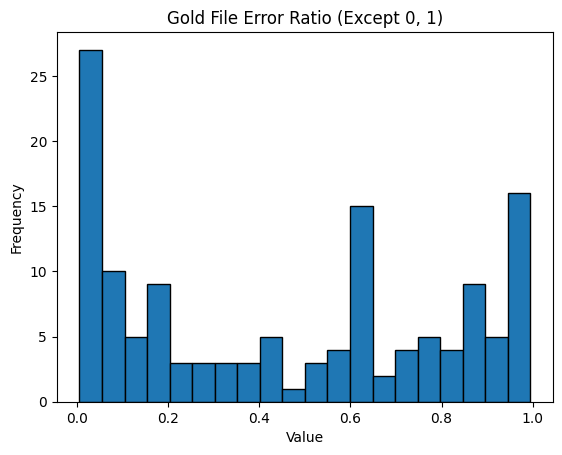

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(unstable_ratio, bins=20, edgecolor='black') 
plt.title('Gold File Error Ratio (Except 0, 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()